<a href="https://colab.research.google.com/github/0mcodes/NLP/blob/main/Fake_News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!git clone https://github.com/AshishJangra27/Fake-News-Classification

!unzip /content/Fake-News-Classification/Fake.zip
!unzip /content/Fake-News-Classification/True.zip

!python -m spacy download en_core_web_lg

Cloning into 'Fake-News-Classification'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (11/11), 40.48 MiB | 31.21 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Archive:  /content/Fake-News-Classification/Fake.zip
  inflating: Fake.csv                
  inflating: __MACOSX/._Fake.csv     
Archive:  /content/Fake-News-Classification/True.zip
  inflating: True.csv                
  inflating: __MACOSX/._True.csv     
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'R

## Importing Libraries

In [9]:
import re
import nltk
import spacy
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_lg')

ps = PorterStemmer()
warnings.filterwarnings(action='ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading Dataset

In [10]:
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

true['fake'] = 0
fake['fake'] = 1

df = pd.DataFrame()
df = pd.concat([true, fake], ignore_index=True)

del true
del fake

df = df.drop(columns = ['date','subject','text'])
df = df.sample(frac = 1)

df.head()

titles = np.array(df['title'])

## Data Preprocessing

In [11]:
corpus = []

for i in tqdm(range(len(titles))):
  news = re.sub(r'^a-zA-Z', '', titles[i])
  news = word_tokenize(news.lower())
  news = ' '.join([ps.stem(word) for word in news if not word in stopwords.words('english')])
  news = nlp(news).vector
  corpus.append(news)

X = np.array(corpus)

X_train = X[:40000]
y_train = df['fake'][:40000]
X_test  = X[40000:]
y_test  = df['fake'][40000:]

100%|██████████| 44898/44898 [09:09<00:00, 81.72it/s]


## Training Classifier

In [12]:
classifier = LogisticRegression(random_state = 1, max_iter = 50)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=50, random_state=1)

## Model Evaluation

[[2172  103]
 [ 167 2456]]
Accuracy :  94.49


<Axes: >

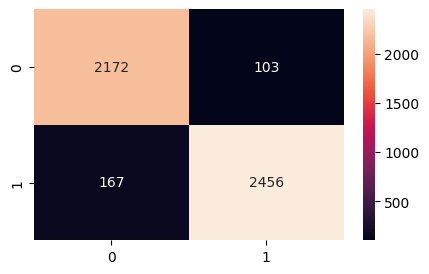

In [13]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy : ' , round(accuracy_score(y_test,y_pred)*100,2))

plt.figure(figsize = (5,3))
sns.heatmap(cm, annot = True, fmt = 'd')